In [2]:
from wyckoff_transformer.tokenization import load_tensors_and_tokenisers
tensors, tokenisers, token_engineers = load_tensors_and_tokenisers(
    "matbench_discovery_mp_trj_full", "sg_multiplicity_energy")

In [40]:
import gzip
import pickle
with gzip.open("cache/matbench_discovery_mp_trj_full/data.pkl.gz", "rb") as f:
    dataset_pd = pickle.load(f)

In [41]:
dataset_pd = dataset

In [17]:
import torch
for dataset_name, dataset in tensors.items():
    for name, data in dataset.items():
        if isinstance(data, torch.Tensor):
            print(name, data.shape)
            nan_count = data.isnan().sum().item()
            if nan_count > 0:
                raise ValueError(f"Found {nan_count} NaNs in {dataset_name}/{name}")
            print(data.min(), data.max())

site_symmetries torch.Size([1422355, 198])
tensor(0, dtype=torch.int32) tensor(82, dtype=torch.int32)
elements torch.Size([1422355, 198])
tensor(0, dtype=torch.int32) tensor(91, dtype=torch.int32)
sites_enumeration torch.Size([1422355, 198])
tensor(0, dtype=torch.int32) tensor(10, dtype=torch.int32)
multiplicity torch.Size([1422355, 198])
tensor(0, dtype=torch.int32) tensor(192, dtype=torch.int32)
spacegroup_number torch.Size([1422355, 112])
tensor(0, dtype=torch.int32) tensor(1, dtype=torch.int32)
formation_energy_per_atom torch.Size([1422355])
tensor(-7.0851) tensor(7.5123)
pure_sequence_length torch.Size([1422355])
tensor(0, dtype=torch.int32) tensor(198, dtype=torch.int32)
site_symmetries torch.Size([256963, 198])
tensor(0, dtype=torch.int32) tensor(82, dtype=torch.int32)
elements torch.Size([256963, 198])
tensor(0, dtype=torch.int32) tensor(91, dtype=torch.int32)
sites_enumeration torch.Size([256963, 198])
tensor(0, dtype=torch.int32) tensor(10, dtype=torch.int32)
multiplicity tor

In [18]:
import matplotlib.pyplot as plt

In [30]:
empty = (tensors['train']['pure_sequence_length'] == 0).nonzero(as_tuple=True)[0]

In [47]:
empty
import pandas as pd

In [48]:
mptrj_orig = pd.read_csv("data/matbench_discovery_mp_trj_full/train.csv.gz", index_col=0)

In [98]:
mptrj_orig.iloc[empty].cif.to_csv("pyxtal_failures.csv.gz")

In [57]:
from data import read_cif

In [59]:
read_cif(example.cif)

Structure Summary
Lattice
    abc : 5.09398096 8.99462678 8.99462678
 angles : 119.99999847 90.0 90.0
 volume : 356.90633029091344
      A : 5.09398096 0.0 3.1191637387907807e-16
      B : -4.769739295756444e-16 7.7895754091340015 -4.49731318199078
      C : 0.0 0.0 8.99462678
    pbc : True True True
PeriodicSite: Er0 (Er) (-3.185e-16, 5.201, 4.486) [0.0, 0.6677, 0.8326]
PeriodicSite: Er1 (Er) (-7.867e-17, 1.285, 2.248) [0.0, 0.1649, 0.3323]
PeriodicSite: Er2 (Er) (-7.985e-17, 1.304, 6.758) [0.0, 0.1674, 0.8351]
PeriodicSite: Er3 (Er) (-3.18e-16, 5.193, 1.387e-07) [0.0, 0.6667, 0.3333]
PeriodicSite: S4 (S) (-4.765e-16, 7.782, 0.001166) [0.0, 0.999, 0.4996]
PeriodicSite: S5 (S) (-2.388e-16, 3.9, -2.243) [0.0, 0.5006, 0.00099]
PeriodicSite: S6 (S) (-2.387e-16, 3.898, 2.241) [0.0, 0.5004, 0.4994]
PeriodicSite: S7 (S) (0.0, 0.0, 0.0) [0.0, 0.0, 0.0]
PeriodicSite: I8 (I) (2.547, 6.538, -2.279) [0.5, 0.8393, 0.1662]
PeriodicSite: I9 (I) (2.547, 2.547, -0.02472) [0.5, 0.3269, 0.1607]
Periodi

In [91]:
import pyxtal
structure = read_cif(example.cif)

In [94]:
px = pyxtal.pyxtal()
px.from_seed(structure, tol=0.1)

In [95]:
px.atom_sites

[]

In [82]:

px.group.number

187

In [45]:
dataset_pd['train'].iloc[214421]

site_symmetries                      []
elements                             []
multiplicity                         []
wyckoff_letters                      []
sites_enumeration                    []
dof                                  []
spacegroup_number                   187
sites_enumeration_augmented        (())
composition                          {}
formation_energy_per_atom     -1.729765
Name: 849670, dtype: object

In [29]:
tensors['train']['formation_energy_per_atom'][empty] 

tensor([-1.7298, -1.6748,  0.0405])

tensors['train'][]

In [26]:
tensors['train']['pure_sequence_length'].max()

tensor(198, dtype=torch.int32)

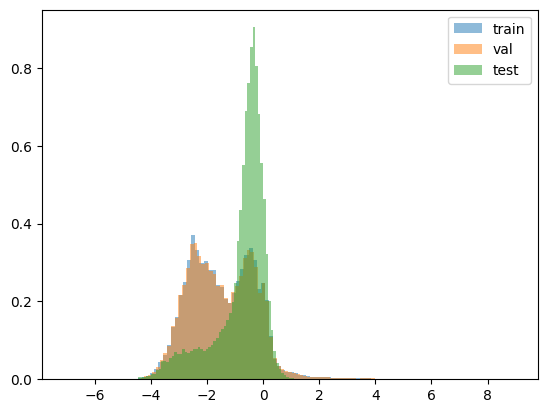

In [21]:
fig, ax = plt.subplots()
ax.hist(tensors['train']['formation_energy_per_atom'].numpy(), bins=100, density=True, alpha=0.5, label='train')
ax.hist(tensors['val']['formation_energy_per_atom'].numpy(), bins=100, density=True, alpha=0.5, label='val')
ax.hist(tensors['test']['formation_energy_per_atom'].numpy(), bins=100, density=True, alpha=0.5, label='test')
ax.legend();